In [3]:
%matplotlib inline

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

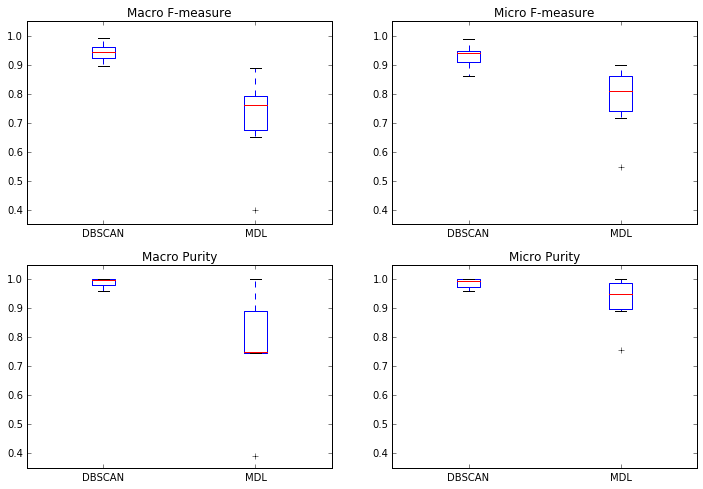

In [63]:

label_list = ["asp", "youtube", "douban", "rotten", "hupu" ,"stack"]


micro_fmeasure_dbscan = [0.988484490332, 0.90456953191, 0.932245010327, 0.860792999131, 0.950289058318, 0.947359741641]
macro_fmeasure_dbscan = [0.993571162487, 0.917238794192, 0.937600575337, 0.894677282139, 0.963173146583, 0.952694208195]
micro_purity_dbscan = [1.0, 1.0, 0.969633507853, 0.95966029724, 1.0, 0.987668161435]
macro_purity_dbscan = [1.0, 1.0, 0.972987931021, 0.959401709402, 1.0, 0.996923076923]
micro_precision_dbscan = [1.0, 1.0, 0.961052978091, 0.94211384647, 0.998922413793, 0.977963047587]
macro_precision_dbscan = [1.0, 1.0, 0.958863873395, 0.867164003759, 0.9375, 0.950498188406]

micro_fmeasure_c = [0.876897737886, 0.717746495886, 0.89973445297, 0.545994387121, 0.81072253255, 0.812257038817]
macro_fmeasure_c = [0.798444984704, 0.778272159385, 0.889301044965, 0.398220193542, 0.650093505522, 0.744911527227]
micro_purity_c = [0.890704800817, 1.0, 0.973821989529, 0.756900212314, 0.992608236536, 0.923766816143]
macro_purity_c = [0.745535714286, 1.0, 0.937661560512, 0.3913011835, 0.75, 0.750575602887]
micro_precision_c = [0.891730371763, 1.0, 0.962141381885, 0.776110166581, 0.986208705769, 0.943989752084]
macro_precision_c = [0.75, 1.0, 0.916536571894, 0.440582538476, 0.747580645161, 0.840906234289]

y_min = 0.35
y_max = 1.05


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
macro_f = [macro_fmeasure_dbscan,macro_fmeasure_c]
micro_f = [micro_fmeasure_dbscan, micro_fmeasure_c]
macro_purity = [macro_purity_dbscan, macro_purity_c]
micro_purity = [micro_purity_dbscan, micro_purity_c]
labels = ["DBSCAN","MDL"]

axes[0, 0].boxplot(macro_f,labels=labels)
axes[0, 0].set_title('Macro F-measure')
axes[0, 0].set_ybound(y_min,y_max)
axes[0,1].boxplot(micro_f,labels=labels)
axes[0,1].set_title("Micro F-measure")
axes[0, 1].set_ybound(y_min,y_max)

axes[1, 0].boxplot(macro_purity,labels=labels)
axes[1, 0].set_title('Macro Purity')
axes[1, 0].set_ybound(y_min,y_max)
axes[1,1].boxplot(micro_purity,labels=labels)
axes[1,1].set_title("Micro Purity")
axes[1,1].set_ybound(y_min,y_max)

#fig.suptitle("Clustering Evaluation")

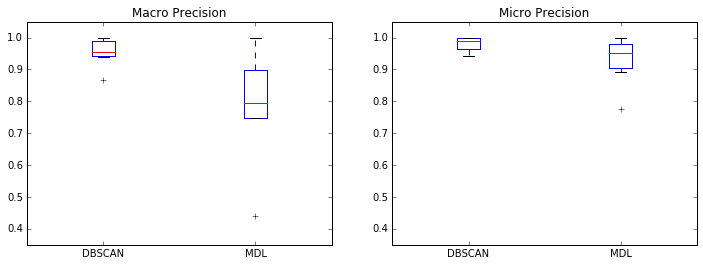

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
macro_precision = [macro_precision_dbscan,macro_precision_c]
micro_precision = [micro_precision_dbscan, micro_precision_c]
labels = ["DBSCAN","MDL"]

axes[0].boxplot(macro_precision,labels=labels)
axes[0].set_title('Macro Precision')
axes[0].set_ybound(y_min,y_max)
axes[1].boxplot(micro_precision,labels=labels)
axes[1].set_title("Micro Precision")
axes[1].set_ybound(y_min,y_max)
#fig.suptitle("Classifying Evaluation")

In [8]:
# fake up some more data
data = np.concatenate((spread, center, flier_high, flier_low), 0)
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

AttributeError: 'list' object has no attribute 'shape'

0.994333333333


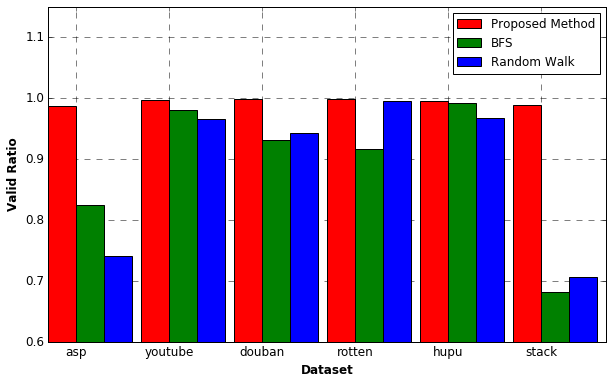

In [5]:


label_list = ["asp", "youtube", "douban", "rotten", "hupu" ,"stack"]
valid_rate_our = [0.987,0.997,0.999,0.999,0.995,0.989]
valid_rate_bfs = [0.824,0.981,0.932,0.916,0.992,0.682]
valid_rate_rw = [0.741,0.966,0.943,0.996,0.968,0.707]

print np.mean(valid_rate_our)


N = len(label_list)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
width = 0.30
ind = np.arange(N)
y_bound_min = 0.60
y_bound_max = 1.15
y_step = np.arange(y_bound_min, y_bound_max + 0.001, 0.1)

plot_valid_rate_our = ax1.bar(ind + 0.0, valid_rate_our, width, color='r', zorder=3)
plot_valid_rate_bfs = ax1.bar(ind + 0.30, valid_rate_bfs, width, color='g', zorder=3)
plot_valid_rate_rw = ax1.bar(ind + 0.60, valid_rate_rw, width, color='b', zorder=3)

ax1.legend( (plot_valid_rate_our[0], plot_valid_rate_bfs[0], plot_valid_rate_rw[0]), ('Proposed Method','BFS','Random Walk') , fontsize='large',loc='best')
ax1.grid(zorder=0, linestyle='--')
ax1.set_ybound(y_bound_min, 
               
               y_bound_max)
ax1.yaxis.set_ticks(y_step)
ax1.set_ylabel('Valid Ratio', weight='bold', size='large')
ax1.set_xlabel('Dataset', weight='bold', size='large')
ax1.set_xticks(ind+width)
ax1.set_xticklabels(label_list, size='large')
ax1.set_yticklabels(y_step, size='large')


plt.show()